<a href="https://colab.research.google.com/github/HaydeePeruyero/Geometria-Analitica-1/blob/master/15_Transformaciones_Ortogonales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Una Aplicación

En esta sección se presenta una manera de utilizar transformaciones ortogonales para el tratamiento de imágenes con Python. Los ejemplos ilustrados son sencillos, lo importante en este momento es ir aprendiendo las herramientas que Python nos proveé para esta tarea y hacer explícito el resultado de aplicar tal transformación ortogonal.

Lo primero es importar las librerías necesarias: `NumPy`, `Matplotlib` y `OpenCV(cv2)` [Open Source Computer Vision]:

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

A estas alturas, el usuario ya ha de estar familizarizado con las librerías `NumPy` y `Matplotlib`. Por lo que procederemos a explicar brevemente la finalidad de `cv2`:

`OpenCV` es una librería para visión artificial de código abierto que contiene varias funciones para realizar operaciones en imágenes o videos disponible para múltiples lenguajes de programación, en particular, para Python. Cabe mencionar que la visión artificial o por computadora se está utilizando cada vez más para el análisis y tratamiento de imágenes mediante algoritmos de inteligencia artificial.



**¡Manos a la obra!** Lo primero que debemos hacer es ir al link de la siguiente imagen y descargarla en nuestra computadora. Si lo cree conveniente, se sugiere gardarla en el escritorio par un fácil acceso a ella.

![](https://i.imgur.com/sJ2zTol.png)

[Link a la imagen](https://i.imgur.com/sJ2zTol.png)

## De Imágenes a Matrices

Sin entrar en tantos detalles, en el fondo una imagen (digital) no es más que una matriz que contiene píxeles de puntos de datos que la determinan. Se puede pensar que los píxeles son pequeños bloques de información dispuestos en forma de una cuadrícula 2D, y la profundidad de un píxel se refiere a la información de color presente en ella.

En este momento lo que nos interesa es la primera afirmación del párrafo anterior: una imágen es una matriz. Concretamente, un arreglo de `NumPy`.

* Para construir la matriz asociada a la imagen anterior (ya descargada en nuestro escritorio) primero debemos 'cargarla' en Colab. Para esto ingresamos dando clic en el **ícono** de carpeta (folder) en el margen izquierdo de este notebook al siguiente menú de opciones:  
![](https://i.imgur.com/fJRYGlf.png)

* Luego, elejimos la opción de **Subir** y seleccionamos nuestra imagen:  
![](https://i.imgur.com/6F8XSxc.png)

* Después de esto ya tenemos nuestra imagen 'cargada' en Colab bajo el correspondiente nombre:  
![](https://i.imgur.com/udSXhca.png)




Ahora, para obtener la matriz de nuestra imagen utilizamos la función `imread()` que nos proveé la librería `cv2`.

In [0]:
imagen = cv2.imread('/content/sJ2zTol.png')

La función `imread()` carga una imagen del archivo especificado y construye un arreglo de `NumPy` que codifica el modo de color RGB de la imagen. Para esto, la función `imread()` requiere como argumente una variable string `str` que indica la 'ruta' en la cual se encuentra alojada nuestra imagen. Para conocer tal ruta en Colab utilizamos click derecho y seleccionamos la opción *copiar ruta*:
![](https://i.imgur.com/btjnpEL.png)

Una vez hecho esto, simplemente abrimos comillas (simples o dobles) y pegamos la ruta copiada:

    '/content/sJ2zTol.png'


Si desplegamos el valor de la variable `imagen` veremos que en efecto se trata de un arreglo de `NumPy`:

In [0]:
imagen

array([[[252,  91,   9],
        [253,  92,  10],
        [255,  94,  12],
        ...,
        [ 21,  54, 147],
        [ 21,  58, 148],
        [ 23,  63, 151]],

       [[254,  93,  11],
        [254,  93,  11],
        [255,  94,  12],
        ...,
        [ 23,  57, 151],
        [ 15,  52, 142],
        [ 14,  52, 140]],

       [[255,  95,  13],
        [255,  95,  13],
        [255,  95,  13],
        ...,
        [ 16,  56, 152],
        [ 28,  63, 153],
        [ 22,  56, 145]],

       ...,

       [[  0,   6,  49],
        [ 26,  37,  81],
        [ 29,  41,  89],
        ...,
        [ 27,  66, 134],
        [ 27,  65, 129],
        [ 31,  70, 132]],

       [[ 11,  20,  63],
        [  2,  13,  57],
        [  5,  15,  62],
        ...,
        [ 28,  69, 132],
        [ 15,  55, 114],
        [ 27,  67, 125]],

       [[  7,  16,  59],
        [  4,  15,  59],
        [  1,  11,  58],
        ...,
        [ 25,  67, 126],
        [ 51,  95, 148],
        [ 70, 115, 166]]

Para conocer las dimensiones de este arreglo rrecurrimos al método `shape`:

In [0]:
imagen.shape

(327, 490, 3)

**Pregunta 1.** ¿Qué nos dice el resultado anterior?

Para trabajar con las distintas transformaciones en los ejemplos siguientes, primero obtengamos el número de píxeles horizontal y vertical de la imagen:

In [0]:
altura = imagen.shape[0]
altura

327

In [0]:
ancho = imagen.shape[1]
ancho

490

## Ejemplo1 : Reescalamiento (Homotecia)

Como ya sabemos, una homotecia es una transformación que aplicada a una imagen le aumenta o reduce el tamaño.

* La librería `cv2` proveé una función llamada `resize()` que nos permite reescalar las dimensiones de una imagen por un factor constante:

In [0]:
imagen_r1 = cv2.resize(imagen, (int(altura / 2), int(ancho / 2)))

Notemos que `imagen_n1` es nuevamente una matriz que codifica el modo RGB de la imagen original reescalada (homotecia) por un factor de 1/2. Vemos esta matriz:

In [0]:
imagen_r1

array([[[253,  92,  10],
        [255,  96,  14],
        [255,  94,  12],
        ...,
        [177,  72,  46],
        [ 44,  51, 118],
        [ 20,  57, 147]],

       [[254,  94,  12],
        [255,  94,  12],
        [254,  93,  11],
        ...,
        [142,  68,  59],
        [ 36,  58, 131],
        [ 21,  57, 147]],

       [[255,  95,  13],
        [255,  94,  12],
        [255,  95,  13],
        ...,
        [ 99,  69,  83],
        [ 22,  63, 145],
        [ 20,  55, 145]],

       ...,

       [[ 13,  24,  68],
        [  0,   8,  60],
        [  5,  17,  64],
        ...,
        [ 24,  62, 139],
        [ 18,  53, 132],
        [ 27,  63, 132]],

       [[ 14,  25,  69],
        [  5,  13,  62],
        [  2,   7,  51],
        ...,
        [ 23,  60, 135],
        [ 20,  57, 131],
        [ 21,  60, 122]],

       [[  4,  14,  59],
        [  6,  20,  68],
        [  9,  18,  61],
        ...,
        [ 25,  62, 135],
        [ 26,  65, 134],
        [ 45,  88, 142]]

Veamos la imagen generada por esta matriz:

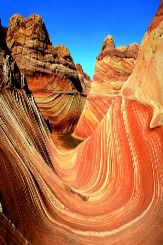

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagen_r1)

Comparemos esta imagan con la original:

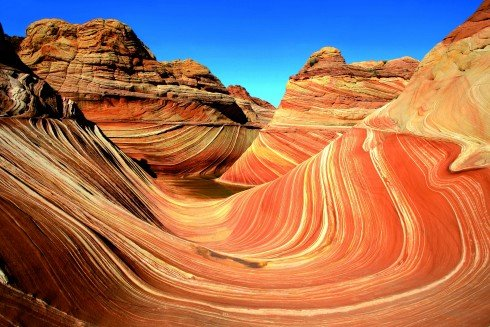

In [0]:
cv2_imshow(imagen)

**Pregunta 2.** ¿Qué observa al comparar las imágenes anteriores?

Como probablemente han de pensar, naturalmente podemos reescalar el resultado del reescalamiento de una imagen dada, en nuestro caso la imagen `imagen_r1` la volvemos a reescalar por un factor 1/2:

In [0]:
imagen_r2 = cv2.resize(imagen_r1, (int(imagen_r1.shape[0] / 2), int(imagen_r1.shape[1] / 2)))

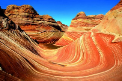

In [0]:
cv2_imshow(imagen_r2)

Comparemos este resultado con el reescalamiento de la imagen original por un factor de 1/4:

In [0]:
imagen_r3 = cv2.resize(imagen, (int(altura / 4), int(ancho / 4)))

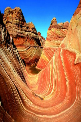

In [0]:
cv2_imshow(imagen_r3)

**Pregunta 3.** Compare los resultados `imagen_r2` e `imagen_r3`. ¿Qué observa?

Finalmente, reescalemos `imagen_r1` por un factor de 2:

In [0]:
imagen_r4 = cv2.resize(imagen_r1, (int(imagen_r1.shape[0] * 2), int(imagen_r1.shape[1] * 2)))

**Pregunta 4.** ¿Qué resultado espera?

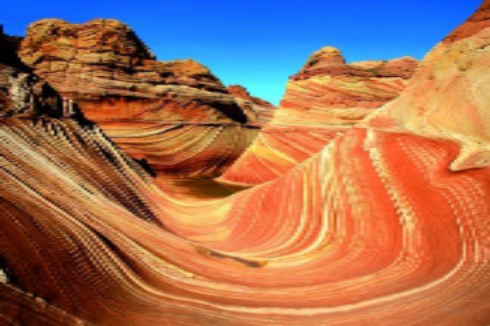

In [0]:
cv2_imshow(imagen_r4)

## Ejemplo 2: Rotación

Con `cv2` podemos girar imágenes por un grado (ángulo) arbitrario en sentido horario o antihorario. Solo necesitamos definir el origen de rotación, el grado de rotación y el factor de escala.

In [0]:
# Aproximamos el centro de la imagen:
centro = (altura // 2, ancho // 2) 

# Generamos la matriz de rotación por un ángulo de 45 grados y SIN rescalamiento (por eso el 1)
Matriz_rotacion = cv2.getRotationMatrix2D(centro, 45, 1) 

# Aplicamos esta rotación al arreglo de Numpy que codifica el modo RGB de la imagen original 
imagen_rot1 = cv2.warpAffine(imagen, Matriz_rotacion, (altura, ancho)) 

Veamos la matriz de rotación resultante en este caso:

In [0]:
Matriz_rotacion

array([[   0.70710678,    0.70710678, -125.49956672],
       [  -0.70710678,    0.70710678,  187.01724394]])

Vemoa el arreglo de `NumPy` que codifica el modo RGB de la imagen rotada:

In [0]:
imagen_rot1

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 47, 101, 227],
        [ 47, 100, 230],
        [ 57, 109, 239]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 52, 108, 222],
        [ 40,  93, 214],
        [ 55, 108, 227]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 83, 140, 243],
        [ 95, 149, 247],
        [ 93, 147, 253]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

**Pregunta 5** ¿Qué observa en las entradas de este arreglo? ¿Puede dar una explicación de ello?

Veamos la imagen rotada:

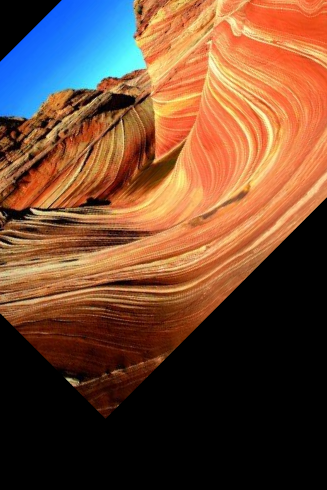

In [0]:
cv2_imshow(imagen_rot1)

Las 2 funciones principales utilizadas aquí son:

>`getRotationMatrix2D()`  
> `warpAffine()`

* `getRotationMatrix2D()`: esta función requiere de 3 argumentos,

>`centro`: Las coordenadas del centro de la imagen.  
>`ángulo`: el ángulo (en grados) por el que se debe girar la imagen.  
>`escala`: el factor de reescalamiento de la imagen.
 
Lo que esta función retorna es una matriz $2 x 3$  cuyas entradas estan determinadas por los valres
>$\alpha = escala * \cos (angulo)$,  
>$\beta = escala * \sin (angulo)$,

\begin{equation*}
M = \left[\begin{array}{ccc} 
        \alpha & \beta & (1 - \alpha)x - \beta * centro * y \\
        -\beta & \alpha & \beta * centro * x + (1 - \alpha)y \\
       \end{array}
     \right].
\end{equation*}

* warpAffine(): esta función transforma la imagen 'fuente' utilizando las componentes de la matriz de rotación $M$,
        dst(x, y) = src(M11X + M12Y + M13, M21X + M22Y + M23),
y calcula las nuevas coordenadas $x$ e $y$ de la imagen y la transforma.